In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

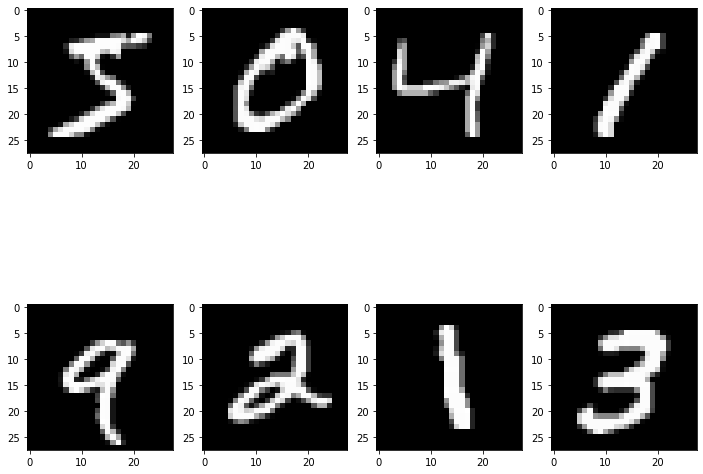

In [ ]:
figure = plt.figure(figsize = (12,10))

for i in range(8):  
  sp = plt.subplot(2,4, i +1)
  plt.imshow(X_train[i])
  plt.gray()

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
y_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [ ]:
noise_factor = 0.3

X_train_noisy = X_train + noise_factor * np.random.normal(0, 1, size = X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(0, 1, size = X_test.shape)

In [ ]:
X_train_noisy = np.clip(X_train_noisy, 0.,1.)
X_test_noisy = np.clip(X_test_noisy, 0.,1.)

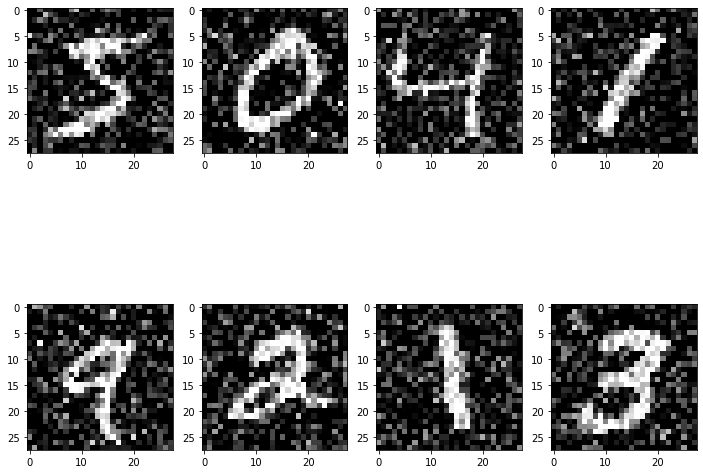

In [ ]:
figure = plt.figure(figsize = (12,10))

for i in range(8):  
  sp = plt.subplot(2,4, i +1)
  plt.imshow(X_train_noisy[i].reshape(28,28))
  plt.gray()

In [ ]:
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

In [ ]:
img_input = layers.Input(shape = (28,28,1))

x = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(img_input)
x = layers.MaxPool2D(2, padding = 'same')(x)

x = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(x)
x = layers.MaxPool2D(2, padding = 'same')(x)

x = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(x)
x = layers.UpSampling2D(2)(x)

x = layers.Conv2D(32, 3, activation = 'relu', padding = 'same')(x)
x = layers.UpSampling2D(2)(x)

output = layers.Conv2D(1,3,activation = 'sigmoid', padding = 'same')(x)

autoencoder = Model(img_input, output)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

In [ ]:
autoencoder.compile(optimizer= Adam(learning_rate = 0.001),
                    metrics = 'acc',
                    loss = 'binary_crossentropy')


In [ ]:
autoencoder.fit(X_train_noisy,
                X_train,
                validation_data = (X_test_noisy, X_test),
                batch_size = 1024,
                epochs = 32)

Epoch 1/32
59/59 [==============================] - 12s 53ms/step - loss: 0.3710 - acc: 0.7982 - val_loss: 0.1880 - val_acc: 0.7970
Epoch 2/32
59/59 [==============================] - 2s 40ms/step - loss: 0.1482 - acc: 0.8034 - val_loss: 0.1256 - val_acc: 0.8078
Epoch 3/32
59/59 [==============================] - 3s 43ms/step - loss: 0.1166 - acc: 0.8101 - val_loss: 0.1077 - val_acc: 0.8110
Epoch 4/32
59/59 [==============================] - 2s 41ms/step - loss: 0.1056 - acc: 0.8120 - val_loss: 0.1011 - val_acc: 0.8119
Epoch 5/32
59/59 [==============================] - 2s 40ms/step - loss: 0.1008 - acc: 0.8127 - val_loss: 0.0976 - val_acc: 0.8123
Epoch 6/32
59/59 [==============================] - 2s 40ms/step - loss: 0.0976 - acc: 0.8132 - val_loss: 0.0955 - val_acc: 0.8127
Epoch 7/32
59/59 [==============================] - 2s 40ms/step - loss: 0.0956 - acc: 0.8134 - val_loss: 0.0937 - val_acc: 0.8124
Epoch 8/32
59/59 [==============================] - 2s 40ms/step - loss: 0.0940 - 

In [ ]:
preds = autoencoder.predict(X_test_noisy)

313/313 [==============================] - 1s 2ms/step


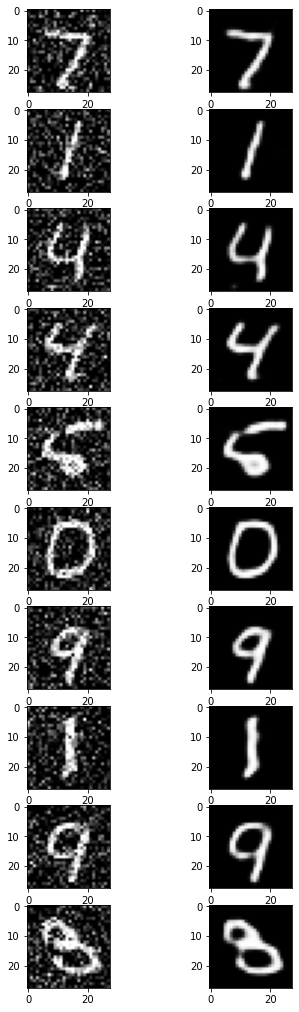

In [ ]:
figure = plt.figure(figsize = (6,18))

for i in range(0,20,2):  
  sp = plt.subplot(10,2, i+1)
  plt.imshow(X_test_noisy[i].reshape(28,28))
  sp = plt.subplot(10,2, i+2)
  plt.imshow(preds[i].reshape(28,28))
  plt.gray()